# Exercício 1

## Bibliotecas

In [33]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from numpy import exp, log

## Gráfico Inicial

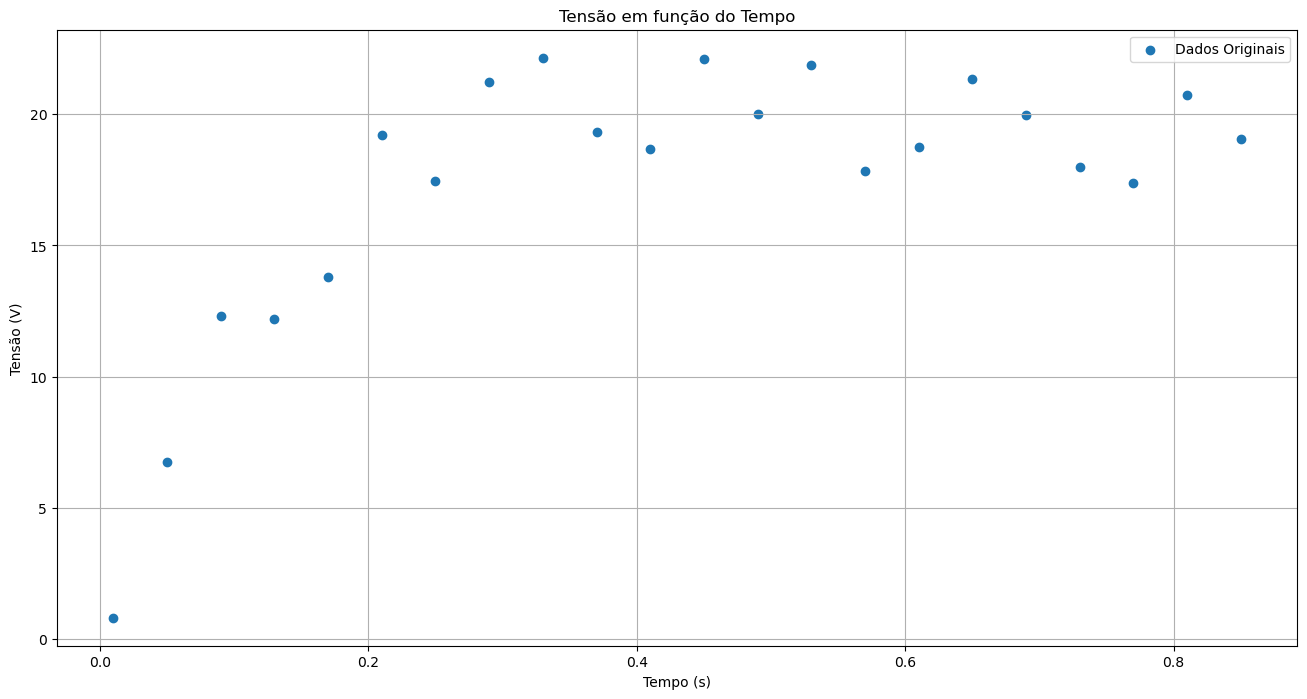

In [6]:
# Gráfico
df = pd.read_csv('data.csv')

x = df['tempo']
y = df['tensao']


plt.figure(figsize=(16, 8))
plt.scatter(x, y, label='Dados Originais')

plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')	
plt.title('Tensão em função do Tempo')
plt.legend()
plt.grid(True)

plt.show()

## Cálculo dos coeficientes

Objetivo: Regressão Exponencial
- Modelo físico: $ v_C(t) = E - E \cdot e^{-t/RC} $
- Forma geral: $ y = a - b \cdot e^{-cx} $

## Linearização para Regressão Exponencial

Para o modelo $ v_C(t) = E(1 - e^{-t/\tau}) $, onde $\tau = RC$:

**Método 1: Transformação Logarítmica**
- Reorganizando: $ E - v_C(t) = E \cdot e^{-t/\tau} $
- Aplicando logaritmo: $ \ln(E - v_C(t)) = \ln(E) - \frac{t}{\tau} $
- Seja $ z = \ln(E - y) $ e $ x' = t $
- O modelo se torna: $ z = \ln(E) - \frac{x'}{\tau} $

**Fórmulas para os coeficientes:**

$$ 
\begin{split}
& \text{Inclinação: } m = \frac{ \sum_{i=1}^{n}{(t_i - \overline{t}) (z_i - \overline{z}) } } {\sum_{i=1}^{n}(t_i - \overline{t})^2} \\
\\
& \text{Intercepto: } b = \overline{z} - m \overline{t} \\
\\
& \text{Onde: } z_i = \ln(E_{est} - y_i) \\
\\
& \text{Parâmetros finais:} \\
& \tau = -\frac{1}{m} \text{ (constante de tempo)} \\\\
& E = e^b \text{ (tensão final)}
\end{split}
$$

**Método 2: Regressão Não-Linear**
- Usar algoritmos de otimização como Levenberg-Marquardt
- Minimizar: $ \sum_{i=1}^{n} [y_i - (a - b \cdot e^{-c \cdot x_i})]^2 $
- Implementação via `scipy.optimize.curve_fit`

In [3]:
# Método 2
def capacitor_function(t, E, tau):
    """
    Função do capacitor: vC(t) = E * (1 - e^(-t/tau))
    onde tau = RC é a constante de tempo
    """
    return E * (1 - np.exp(-t/tau))

# Estimativa inicial dos parâmetros
popt, pcov = curve_fit(capacitor_function, x, y, p0=[max(y), 1.0])
E_fit, tau_fit = popt

print(f'Parâmetros ajustados:')
print(f'E (tensão final): {E_fit:.3f} V')
print(f'τ (constante de tempo RC): {tau_fit:.3f} s')

# Calcular valores ajustados
y_fit = capacitor_function(x, E_fit, tau_fit)

# Erro quadrático médio
mse = np.mean((y - y_fit)**2)
print(f'Erro quadrático médio: {mse:.6f}')


Parâmetros ajustados:
E (tensão final): 20.049 V
τ (constante de tempo RC): 0.107 s
Erro quadrático médio: 2.785378


## Gráfico de Regressão Exponencial

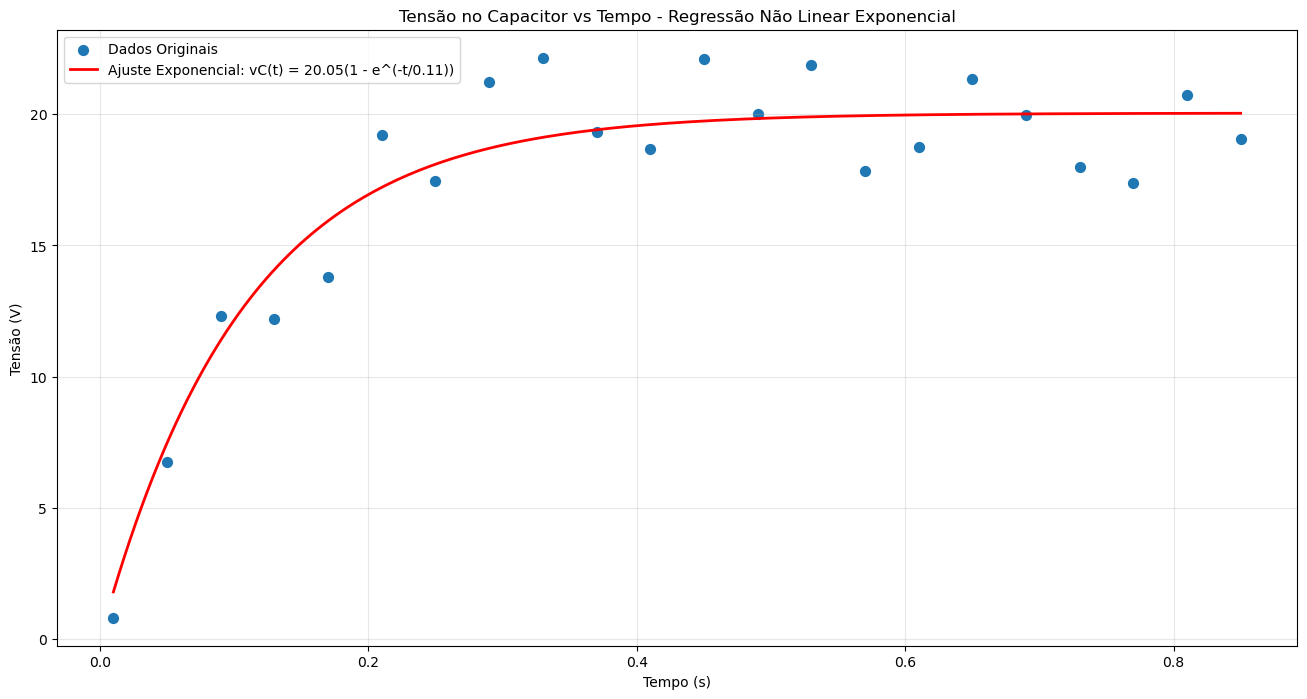

In [4]:
# Gráfico
plt.figure(figsize=(16, 8))
plt.scatter(x, y, label='Dados Originais', s=50)

# Curva ajustada com mais pontos para suavidade
t_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = capacitor_function(t_smooth, E_fit, tau_fit)

plt.plot(t_smooth, y_smooth, color='red', linewidth=2, 
            label=f'Ajuste Exponencial: vC(t) = {E_fit:.2f}(1 - e^(-t/{tau_fit:.2f}))')

plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Tensão no Capacitor vs Tempo - Regressão Não Linear Exponencial')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()